# Star Wars Survey 
*This dataset will be used to answer some questions about Star Wars fan and particulary "If The Empire Strikes Back" is the best of the bunch

In [76]:
#import libraries and introduce the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")
star_wars.head()



,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [77]:
#remove rows with NaN respondentID
star_wars = star_wars.dropna(subset=["RespondentID"])
#remove unneccessary column
cols=[29,30,31,32,35,37]    
star_wars.drop(star_wars.columns[cols],axis=1,inplace=True)

In [78]:
#remove have not seen any of the 6 films
star_wars.drop(star_wars[star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] == "No"].index, inplace=True)


In [79]:
#map Yes/No columns,convert to boolean type
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)
star_wars.head()    


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Gender,Age,Education
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,High school degree
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,High school degree
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,Some college or Associate degree
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29,Some college or Associate degree
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Male,18-29,Bachelor degree


In [80]:
#map the checkbox column
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
  

In [81]:
# give unnamed columns[3:9] meaningful names
star_wars = star_wars.rename(columns = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", "Unnamed: 4": "seen_2", "Unnamed: 5": "seen_3",
               "Unnamed: 6": "seen_4", "Unnamed: 7": "seen_5", "Unnamed: 8": "seen_6"})

star_wars.head()    

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Gender,Age,Education
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,High school degree
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,High school degree
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,Some college or Associate degree
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29,Some college or Associate degree
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Male,18-29,Bachelor degree


In [82]:
#convert column[9:15] to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [83]:
#give unnamed columns[9:15] meaningful names
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

#explore the data
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Gender,Age,Education
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,High school degree
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,High school degree
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,Some college or Associate degree
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29,Some college or Associate degree
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Male,18-29,Bachelor degree


In [84]:
#finding the highest ranked movie
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

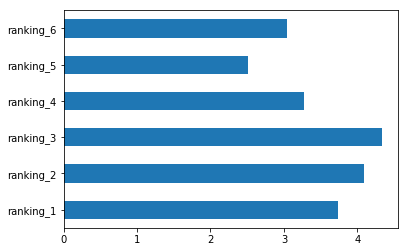

In [85]:

star_wars[star_wars.columns[9:15]].mean().plot(kind='barh')
plt.show()

From the mean and chart above, it is obvious ranking_5; The Empire Strikes Back is the most preferred

In [86]:
#finding the most seen movie
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

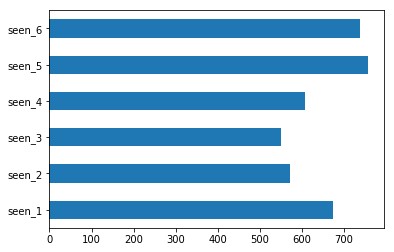

In [87]:
star_wars[star_wars.columns[3:9]].sum().plot(kind='barh')
plt.show()

Above chart shows that seen_5 was the most viewed

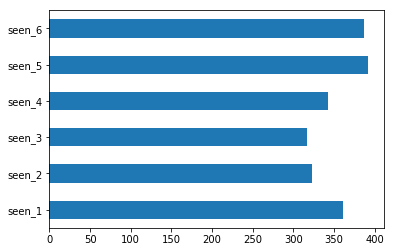

In [88]:
#finding the most viewed by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
males[males.columns[3:9]].sum().plot(kind='barh')
plt.show()

In [89]:
males[males.columns[3:9]].sum()

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

from the graph and data seen_5 and seen_6 are the most viewed by male

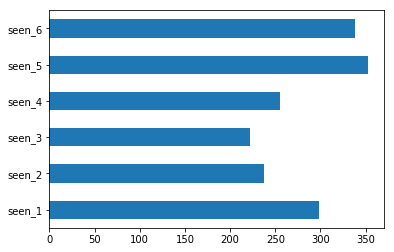

In [90]:

females[females.columns[3:9]].sum().plot(kind='barh')
plt.show()

In [91]:
females[females.columns[3:9]].sum()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

from the graph and data shown above, we can say females viewed seen_5 the most

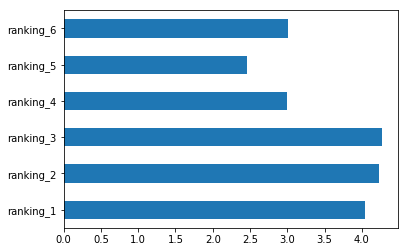

In [92]:
males[males.columns[9:15]].mean().plot(kind='barh')
plt.show()

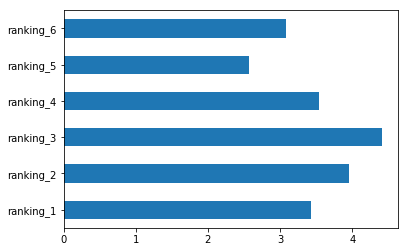

In [93]:
females[females.columns[9:15]].mean().plot(kind='barh')
plt.show()

In [94]:
#clean and rename columns[15:29]
star_wars = star_wars.rename(columns={"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "view_Han_Solo","Unnamed: 16": "view_Luke_Skywalker",
                                     "Unnamed: 17": "view_Princess_Leila", "Unnamed: 18": "view_Anakin_Skywalker", "Unnamed: 19": "view_Obi_wan", "Unnamed: 20": "view_Emperor_Palpatine", "Unnamed: 21": "view_Darth_Vader",
                                     "Unnamed: 22": "view_Lando", "Unnamed: 23": "view_Boba_Fett", "Unnamed: 24": "view_C-3PO", "Unnamed: 25": "view_R2_D2", "Unnamed: 26": "view_Jar_jar_Binks", "Unnamed: 27": "view_Padme_Amidala",
                                     "Unnamed: 28": "view_Yoda"})

In [95]:
#star_wars.head()
star_wars.columns[15]

'view_Han_Solo'

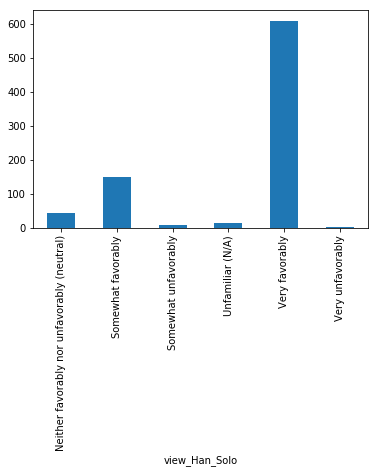

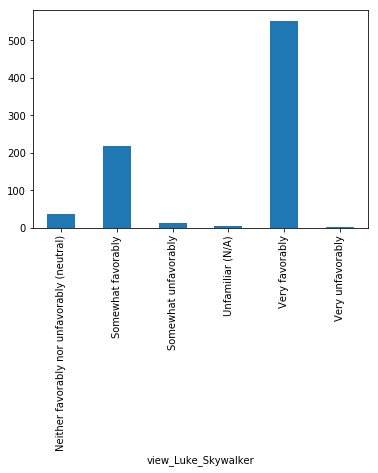

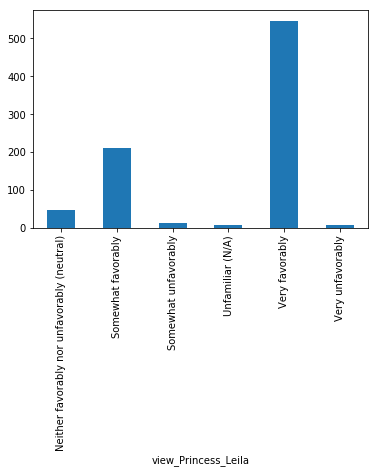

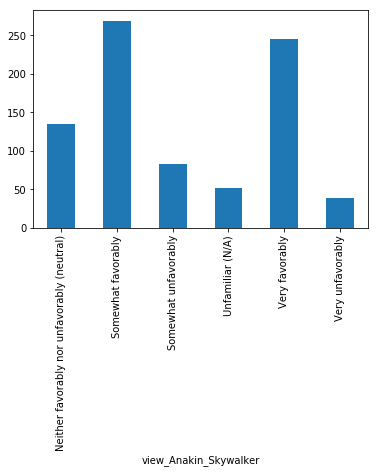

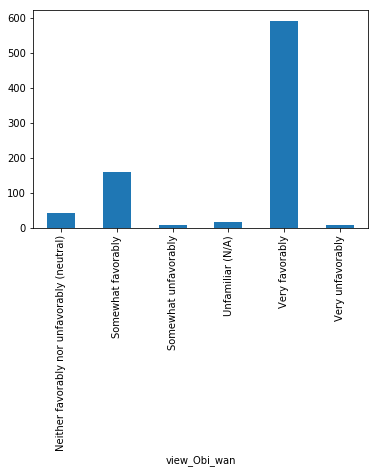

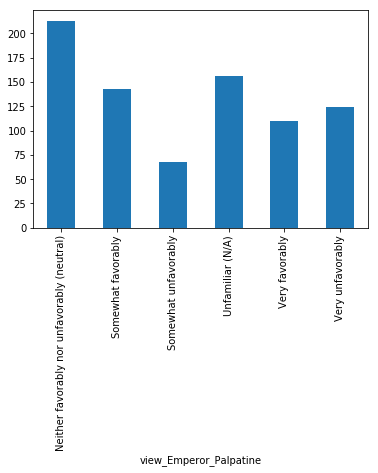

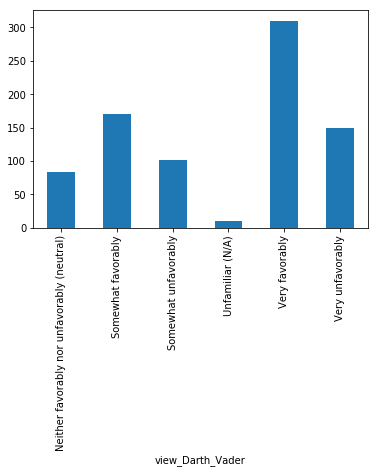

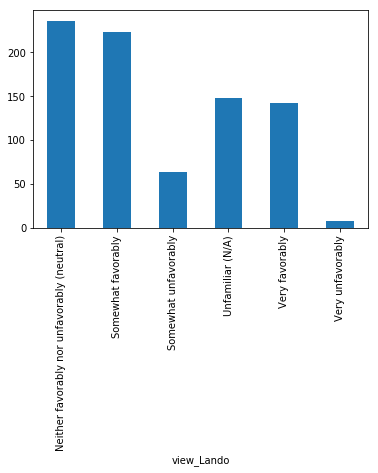

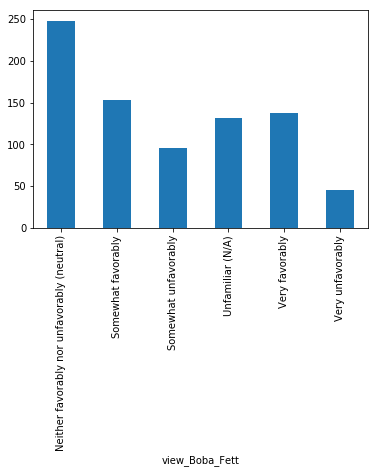

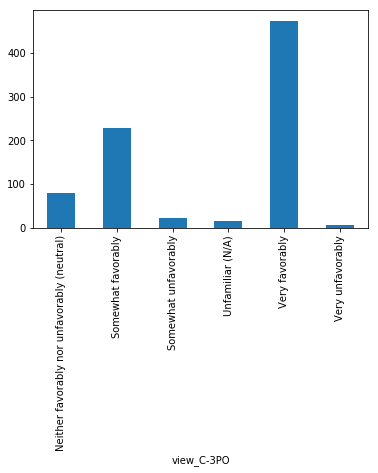

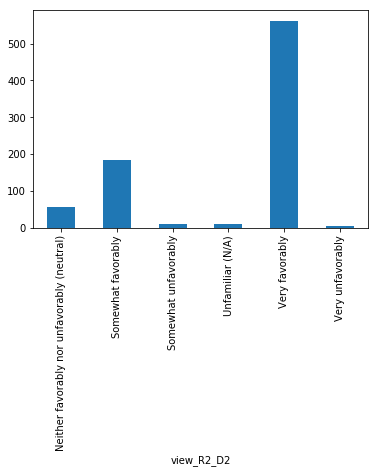

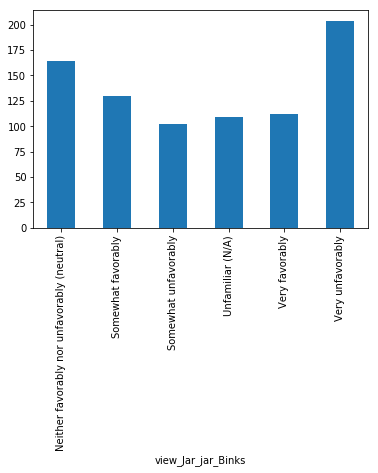

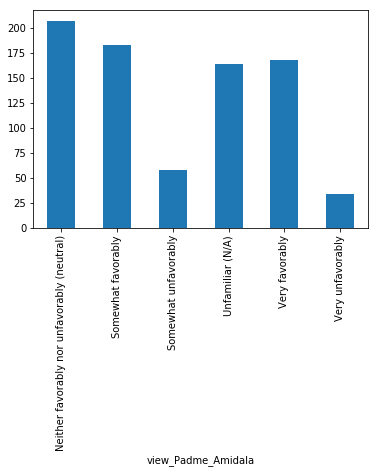

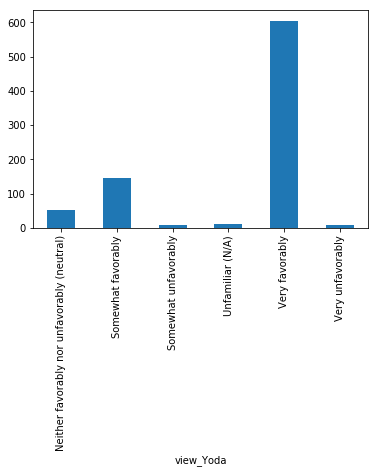

In [96]:
for col in star_wars.columns[15:29]:
    star_wars.groupby(col).RespondentID.count().plot(kind='bar')
    plt.show()

    #print(gk,"\n")
    

In [97]:
view_dict = {}
for col in star_wars.columns[15:29]:
    fav = star_wars.groupby(col).get_group('Very favorably').RespondentID.count()
    view_dict[col] = fav
print(view_dict)

{'view_Han_Solo': 610, 'view_Luke_Skywalker': 552, 'view_Princess_Leila': 547, 'view_Anakin_Skywalker': 245, 'view_Obi_wan': 591, 'view_Emperor_Palpatine': 110, 'view_Darth_Vader': 310, 'view_Lando': 142, 'view_Boba_Fett': 138, 'view_C-3PO': 474, 'view_R2_D2': 562, 'view_Jar_jar_Binks': 112, 'view_Padme_Amidala': 168, 'view_Yoda': 605}


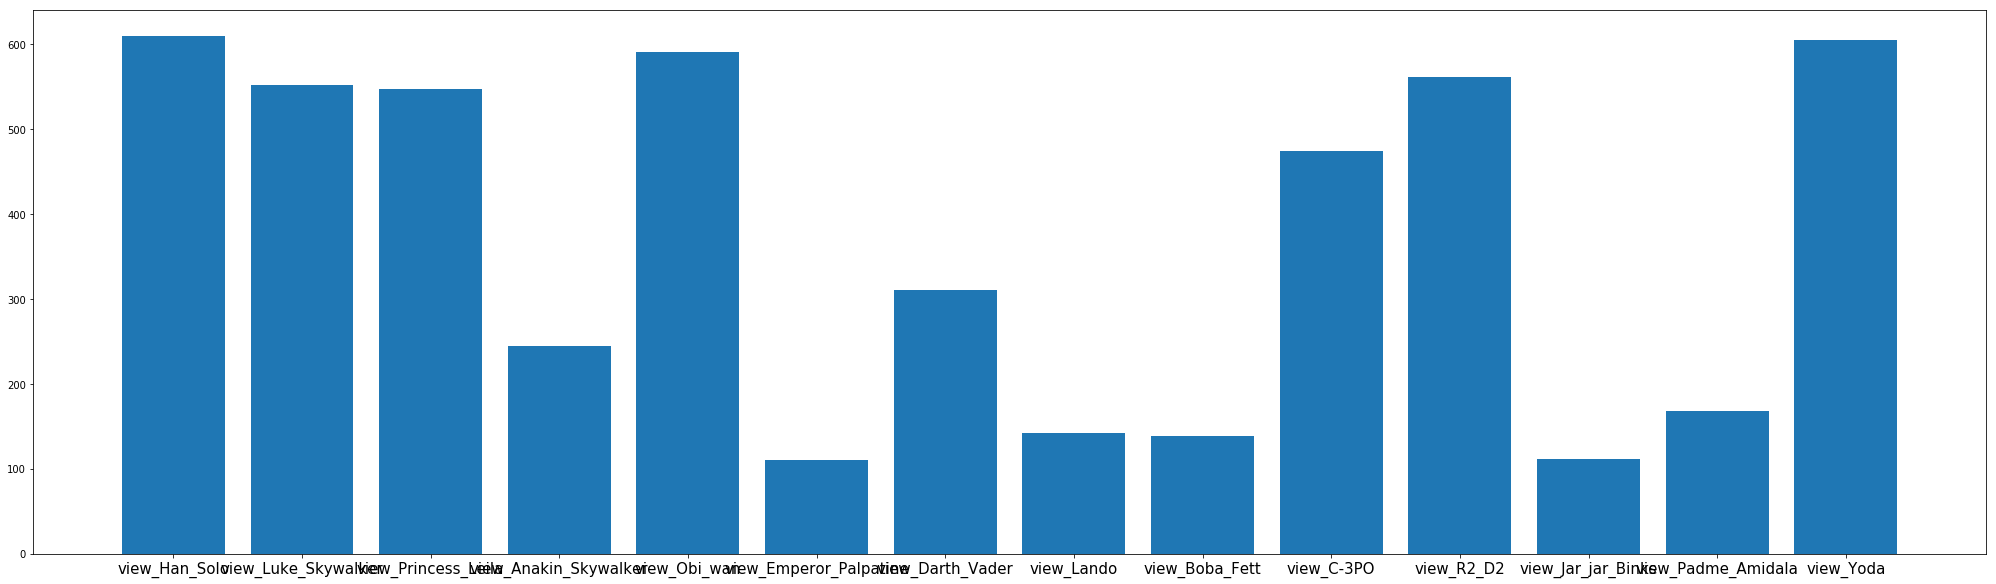

In [98]:
plt.figure(figsize=(35, 10))
plt.xticks(size = 15)
plt.bar(*zip(*view_dict.items()))
plt.show()

from the graph above, it is clear that Han Solo has the most 'very favorably' view

In [99]:
view_dict = {}
for col in star_wars.columns[15:29]:
    fav = star_wars.groupby(col).get_group('Very unfavorably').RespondentID.count()
    view_dict[col] = fav
print(view_dict)

{'view_Han_Solo': 1, 'view_Luke_Skywalker': 3, 'view_Princess_Leila': 6, 'view_Anakin_Skywalker': 39, 'view_Obi_wan': 7, 'view_Emperor_Palpatine': 124, 'view_Darth_Vader': 149, 'view_Lando': 8, 'view_Boba_Fett': 45, 'view_C-3PO': 7, 'view_R2_D2': 6, 'view_Jar_jar_Binks': 204, 'view_Padme_Amidala': 34, 'view_Yoda': 8}


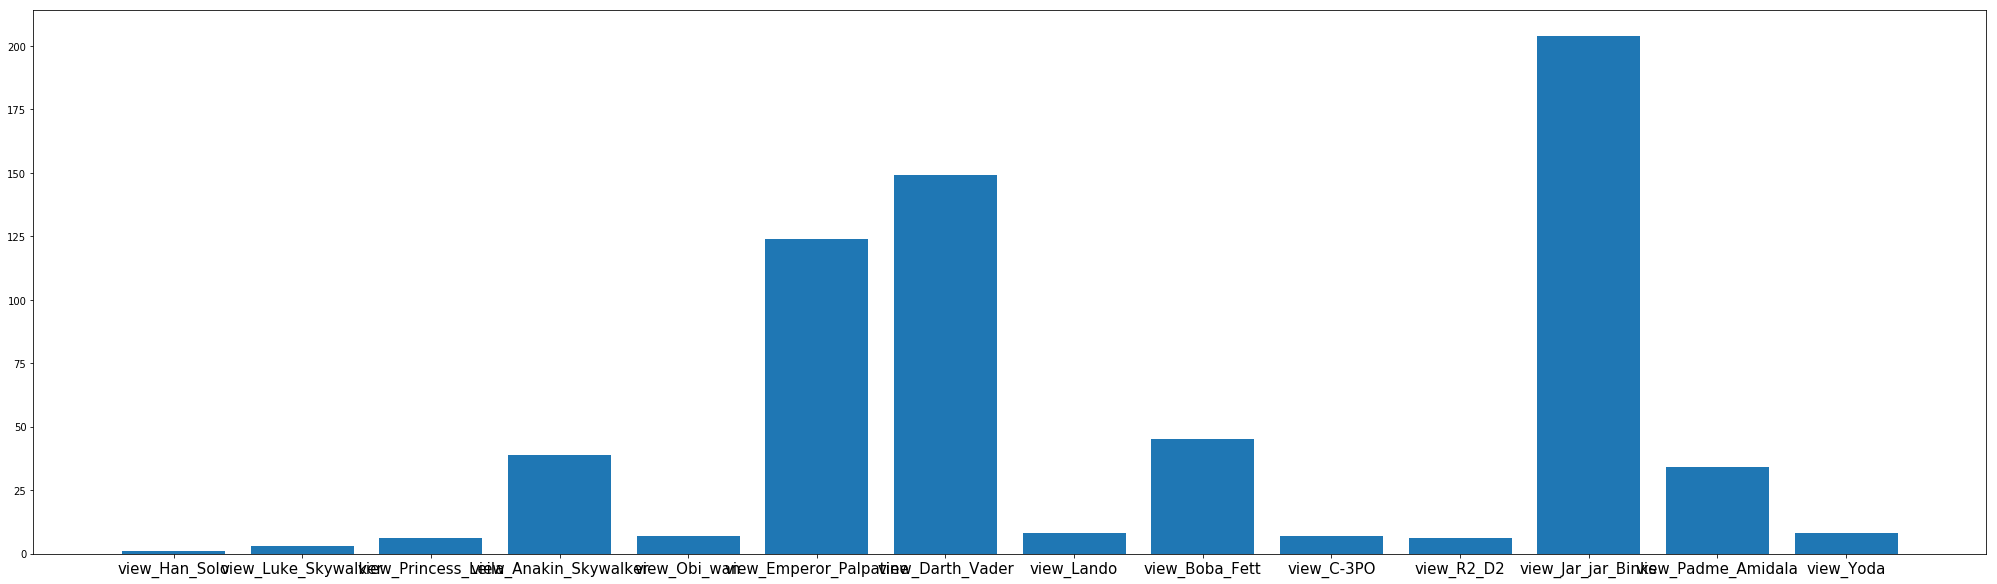

In [100]:
plt.figure(figsize=(35, 10))
plt.xticks(size = 15)
plt.bar(*zip(*view_dict.items()))
plt.show()

from the graph shown above, we can say Jar Jar Binks is the least liked with 204 'very unfavorably'

In [101]:
view_dict = {}
for col in star_wars.columns[15:29]:
    fav = star_wars.groupby(col).get_group('Neither favorably nor unfavorably (neutral)').RespondentID.count()
    view_dict[col] = fav
print(view_dict)

{'view_Han_Solo': 44, 'view_Luke_Skywalker': 38, 'view_Princess_Leila': 48, 'view_Anakin_Skywalker': 135, 'view_Obi_wan': 43, 'view_Emperor_Palpatine': 213, 'view_Darth_Vader': 84, 'view_Lando': 236, 'view_Boba_Fett': 248, 'view_C-3PO': 79, 'view_R2_D2': 57, 'view_Jar_jar_Binks': 164, 'view_Padme_Amidala': 207, 'view_Yoda': 51}


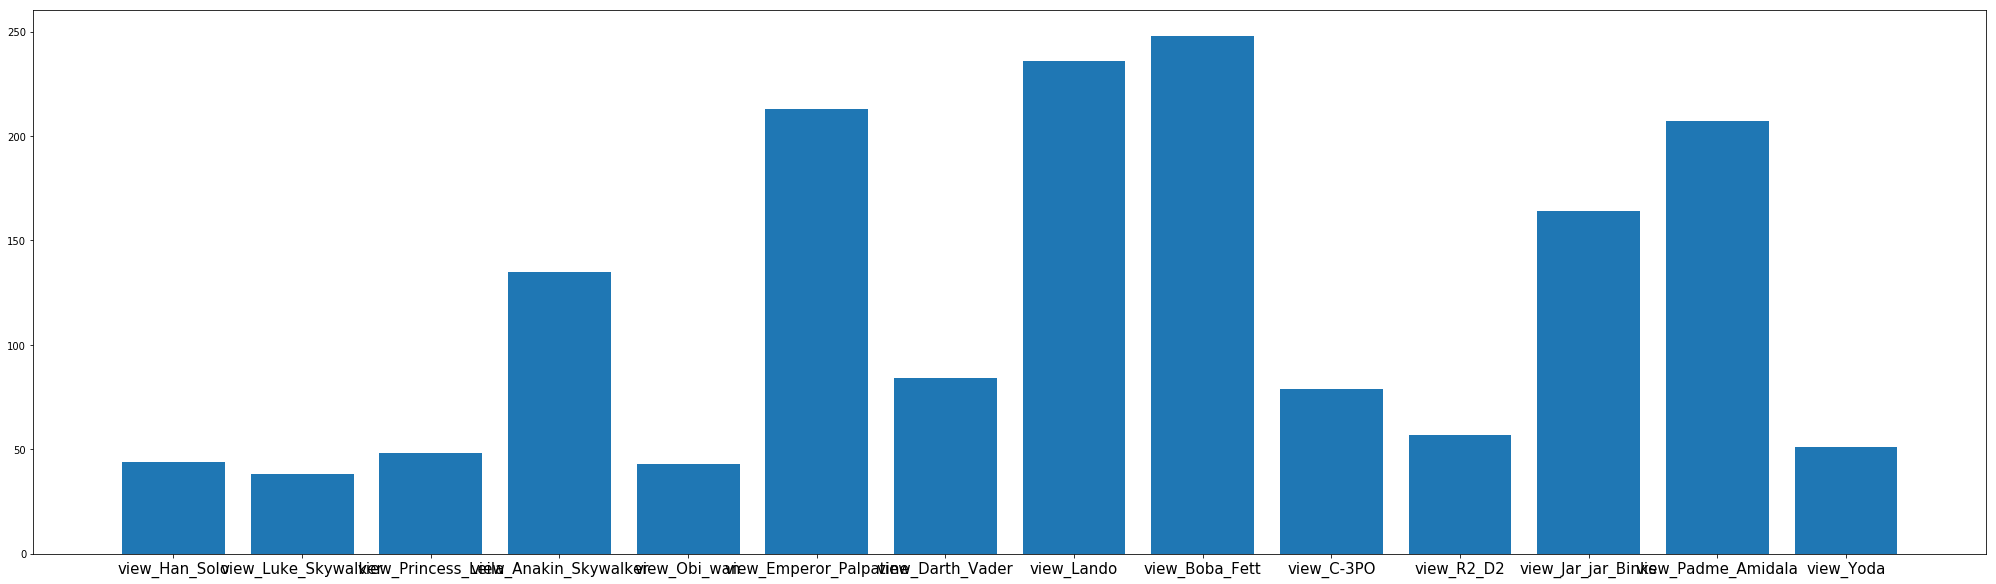

In [102]:
plt.figure(figsize=(35, 10))
plt.xticks(size = 15)
plt.bar(*zip(*view_dict.items()))
plt.show()

The graph above makes it clear that Boba Fett is the most controversial(split between likes and dislikes) followed by Lando 